In [1]:
from deepModelsAnalysis import *

all_RSM_CPC = get_CPC_RSMs(StimType = 'natural_scenes')
# all_RSM_vgg16 = get_othermodels_RSMs(StimType = 'natural_scenes',ModelName='vgg16')



Using DPC-RNN model
final feature map has size 6x6

=======Check Weights Loading======
Weights not used from pretrained file:
module.backbone.conv1.weight
module.backbone.bn1.weight
module.backbone.bn1.bias
module.backbone.layer1.0.conv1.weight
module.backbone.layer1.0.bn1.weight
module.backbone.layer1.0.bn1.bias
module.backbone.layer1.0.conv2.weight
module.backbone.layer1.0.bn2.weight
module.backbone.layer1.0.bn2.bias
module.backbone.layer1.1.conv1.weight
module.backbone.layer1.1.bn1.weight
module.backbone.layer1.1.bn1.bias
module.backbone.layer1.1.conv2.weight
module.backbone.layer1.1.bn2.weight
module.backbone.layer1.1.bn2.bias
module.backbone.layer2.0.conv1.weight
module.backbone.layer2.0.bn1.weight
module.backbone.layer2.0.bn1.bias
module.backbone.layer2.0.conv2.weight
module.backbone.layer2.0.bn2.weight
module.backbone.layer2.0.bn2.bias
module.backbone.layer2.0.downsample.0.weight
module.backbone.layer2.0.downsample.1.weight
module.backbone.layer2.0.downsample.1.bias
module.backb

In [2]:
from allenDataAnalysis import *

all_RSM_Allen = get_RSM(CreLine = ['Cux2-CreERT2'], TargetedStruct = ['VISp'], ImagingDepth = [275], StimType = 'natural_scenes')

number of  Cux2-CreERT2 experiment containers: 8

experiment container: 511510699
 : 1
experiment container: 702934962
 : 1
experiment container: 645413757
 : 1
experiment container: 659767480
 : 1
experiment container: 712178509
 : 1
experiment container: 511510779
 : 1
experiment container: 511510667
 : 1
experiment container: 524691282
 : 1
0 0
there are 287 neurons in this session
(287, 118)
1 0
there are 118 neurons in this session
(118, 118)
2 0
there are 206 neurons in this session
(206, 118)
3 0
there are 143 neurons in this session
(143, 118)
4 0
there are 159 neurons in this session
(159, 118)
5 0
there are 359 neurons in this session
(359, 118)
6 0
there are 212 neurons in this session
(212, 118)
7 0
there are 249 neurons in this session
(249, 118)


In [3]:
import matplotlib.pyplot as plt

all_RSM_model = all_RSM_CPC

r = np.empty([len(all_RSM_model.keys()),all_RSM_Allen.shape[2]])
for i in range(len(all_RSM_model.keys())):
    conv1 = all_RSM_model[list(all_RSM_model.keys())[i]]
    np.fill_diagonal(conv1,'nan')
    annMAX = np.nanmax(conv1)
    annMIN = np.nanmin(conv1)
    conv1 = (conv1 - annMIN)/(annMAX-annMIN)    
    for j in range(0,all_RSM_Allen.shape[2]):
        r[i,j]=compute_ssm(conv1, all_RSM_Allen[:,:,j])
  



In [4]:
r_rand = np.empty([len(all_RSM_model.keys()),50])
for iter in range(0,50):
    j = np.random.randint(all_RSM_Allen.shape[2])
    RSM_v1 = all_RSM_Allen[:,:,j]
    rand_RSM_v1 = shuffle_similarity_mat(RSM_v1)

    for i in range(len(all_RSM_model.keys())):
        conv1 = all_RSM_model[list(all_RSM_model.keys())[i]]
        np.fill_diagonal(conv1,'nan')
        annMAX = np.nanmax(conv1)
        annMIN = np.nanmin(conv1)
        conv1 = (conv1 - annMIN)/(annMAX-annMIN)    
        r_rand[i,iter]=compute_ssm(conv1, rand_RSM_v1)


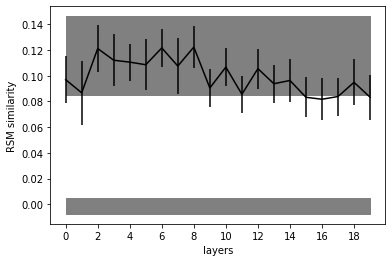

In [5]:
# plt.plot(r)
PATH_figures = '/Users/shahab/Mila/Results/DeepMouse/RSM/Mouse_vs_Models/VISp/'
ModelType = 'CPC'
StimType = 'DG'
ImagingDepth = '275'
CreLine = 'Cux2-CreERT2'

thisFigureName = PATH_figures + ModelType + StimType + ImagingDepth + CreLine + '.png'
R = compare_multi_RSMs(all_RSM_Allen)
np.fill_diagonal(R,'nan')

plt.fill_between(np.arange(0,r.shape[0]), np.transpose(np.nanmedian(R)*np.ones((r.shape[0],1))-np.nanstd(R)*np.ones((r.shape[0],1))/2)[0], 
                 np.transpose(np.nanmedian(R)*np.ones((r.shape[0],1))+np.nanstd(R)*np.ones((r.shape[0],1))/2)[0],color='grey')
plt.fill_between(np.arange(0,r.shape[0]), np.transpose(np.median(r_rand,1)-np.std(r_rand,1)/2)[0], 
                 np.transpose(np.median(r_rand,1)+np.std(r_rand,1)/2)[0],color='grey')

plt.errorbar(np.arange(0,r.shape[0]),np.median(r,1),xerr=0, yerr=np.std(r,1)/2,color='black')

plt.xticks(np.arange(0, r.shape[0], step=2))
plt.xlabel('layers')
plt.ylabel('RSM similarity')
plt.savefig(thisFigureName)

In [ ]:
boc = BrainObservatoryCache()
targeted_structures = boc.get_all_targeted_structures()
imaging_depths = boc.get_all_imaging_depths()
cre_lines =boc.get_all_cre_lines()
print(cre_lines)